# Project -  Building a Trainer and a Binary Classifier based on Naive Bayes Algorithm 

**Background**: 

[Bayes Theorem](https://blogs.scientificamerican.com/cross-check/bayes-s-theorem-what-s-the-big-deal/) is a method for calculating the validity of beliefs (hypotheses, claims, propositions) based on the best available evidence (observations, data, information), and in its simplest explanation is that an initial belief applied with new evidence leads to an improvement in the initial belief. 

More specifically: "The probability that a belief is true given new evidence equals the probability that the belief is true regardless of that evidence times the probability that the evidence is true given that the belief is true divided by the probability that the evidence is true regardless of whether the belief is true". 

Mathematically, we can express this relationship as:
P(B|E) = P(B) X P(E|B) / P(E), 
with P standing for probability, B for belief and E for evidence. P(B) is the probability that B is true, and P(E) is the probability that E is true. P(B|E) means the probability of B if E is true, and P(E|B) is the probability of E if B is true.

**Naive Bayes algorithm** is a simple multinomial application of Bayes Theorem based on the idea that if the probability of a belief when applied with evidence is greater than the probability of the non-belief when applied with same evidence then the belief is "more true" than the "non-belief" or vice versa.

Mathematically,
$$\begin{equation}
P(B | e1,e2,...,e𝑛) \propto P(Spam) \cdot \prod_{i=1}^{n}P(e_i|B)
\end{equation}$$

and 

$$\begin{equation}
P(B^C | e_1,e_2, ..., e_n) \propto P(B^C) \cdot \prod_{i=1}^{n}P(e_i|B^C)
\end{equation}$$

where:

B is belief and e_1, e_2, ....e_n are all the evidences applied to the belief.

### **Aim and Goals of the Project**:


- In this project, we will develop a `trainer function` to train a model with any training dataset, based on a multinomial version of **Naive Bayes** algorithm conditioned with additive smoothing. Trained model will be used for providing input to a **binary classifier**
- We will then **`unit test`** the `trainer function` to verify the accuracy of the complex calculations and code performed inside the `trainer function`.
- We will also develop a `binary classifier` or a `filter function` to distinguish between `positive` and `negative` based on trained model input (in this case spam and non-spam messages sent via SMS).
- Both the **trainer** and **classifier** will be general enough to be applied to a variety of problems requiring binary classification using any number of training datasets. 
- We will also develop a third function aimed at determining the accuracy of the `algorithm` against a pre-classified `test dataset`
-  A human classified and labeled dataset, consisting of 5572 SMS messages will be used for calculation of `prior` probabilities (beliefs and evidences, as explained above) using the `SMS` training dataset. The binary classifier will then calculate the `posterior` probabilities for any new messages to be classified as `spam` or `non-spam`.
- Since any dataset of the format `['Label', 'Information']` can be used by the algorithm for training, We have also provided a **A Guide for Data Cleaning and Formatting** for use with the algorithm at **Appendix-I** 
- Since a number of core probability functions are frequently required for basic calculations, We have developed a series of core `conditional probability` functions for use in any conditional probability problems These are enclosed as **Appendix-II** to this project. 


### Conditional Probability Core Functions
A number of functions involving repeated probability calculations will be required. In order to facilitate calculations, we will write a set of core functions or a library of core conditional probability functions.

**These functions are given at Appendix-II**

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

In [2]:
# Preliminary Data Exploration
sms = pd.read_csv('SMSSpamCollection', sep = '\t', header = None, names = ['Label', 'SMS'])
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [3]:
sms.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


ham     0.865937
spam    0.134063
Name: Label, dtype: float64


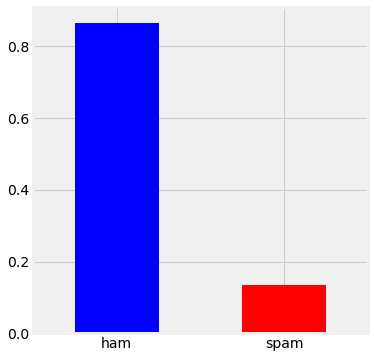

In [4]:
print(sms['Label'].value_counts(normalize = True))

fig = plt.figure(figsize=(6, 6))  
plt.style.use('fivethirtyeight')
sms['Label'].value_counts(normalize = True).plot.bar(color = ['blue','red'], rot = 0)
plt.show()

### Data Training and Testing
Our data set is approximately made up of 87% 'ham(non-spam)' and 13& 'spam' messages.
We will split the above dataset into two categories by randomizing the entire dataset to ensure that spam and ham (non-spam) messages are spread proportionately throughout the dataset.:
**Training Set** for training the model on how to classify messages. 80% of the dataset or 4458 messages will be used for training.
**Test Set** for testing the spam filter performance. Remaining 20% i.e. 1114 messages will be used for testing. Spam filter must classify new messages with an accuracy greater than 80% as spam or ham (non-spam).



In [5]:
# Randomize and split dataset into training and test sets
sms = sms.sample(frac = 1, random_state = 1)
sms_training = sms.head(int(0.8*sms.Label.size)+1).reset_index(drop = True) # To round of the next higher integer
sms_test = sms.tail(int(0.2*sms.Label.size)).reset_index(drop = True)
print(sms_training.info())
print(sms_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4458 entries, 0 to 4457
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4458 non-null   object
 1   SMS     4458 non-null   object
dtypes: object(2)
memory usage: 69.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   1114 non-null   object
 1   SMS     1114 non-null   object
dtypes: object(2)
memory usage: 17.5+ KB
None


Training:  
 ham     0.86541
spam    0.13459
Name: Label, dtype: float64


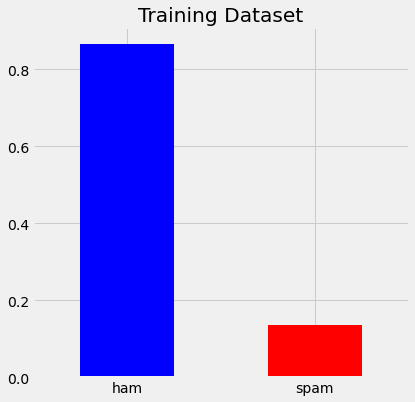

In [6]:
# Check proportion of ham and spam in training dataset
print("Training: ", '\n', sms_training['Label'].value_counts(normalize = True))

fig = plt.figure(figsize=(6, 6))  
plt.style.use('fivethirtyeight')
sms_training['Label'].value_counts(normalize = True).plot.bar(color = ['blue','red'], rot = 0)
plt.title("Training Dataset")
plt.show()

Test:  
 ham     0.868043
spam    0.131957
Name: Label, dtype: float64


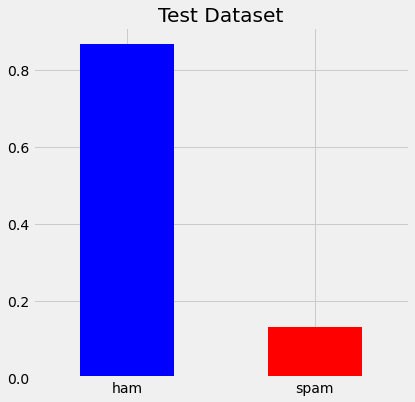

In [7]:
# Check proportion of ham and spam in test dataset
print("Test: ", '\n', sms_test['Label'].value_counts(normalize = True))
fig = plt.figure(figsize=(6, 6))  
plt.style.use('fivethirtyeight')
sms_test['Label'].value_counts(normalize = True).plot.bar(color = ['blue','red'], rot = 0)
plt.title("Test Dataset")
plt.show()

### Organizing Datasets

We have to organize datasets in a format in which it is possible to count probabilities of particular words occurring in a message P(w/spam) and p(w/ham), such as:
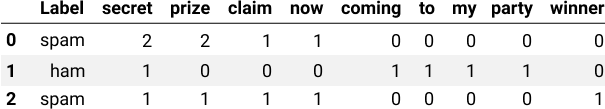

**This function is automatically performed by the nbayes_trainer function written below**.
**Details are given in the Appendix_I**

In [8]:
sms_training.info()
print(sms_training.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4458 entries, 0 to 4457
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4458 non-null   object
 1   SMS     4458 non-null   object
dtypes: object(2)
memory usage: 69.8+ KB
  Label                                                SMS
0   ham                       Yep, by the pretty sculpture
1   ham      Yes, princess. Are you going to make me moan?
2   ham                         Welp apparently he retired
3   ham                                            Havent.
4   ham  I forgot 2 ask ü all smth.. There's a card on ...


**Vocabulary List and Concatenation**

We will need a vocabulary list in order to calculate probabilities and apply the smoothing function to the Naive-Bayes. We will also need to combine the formatted training dataset with the original dataset. 

**This function is automatically performed by the nbayes_trainer function written below**.
**Details are given in the Appendix_I**

### Application of Naive Bayes Algorithm

We have to incorporate the equations for distinguishing spam and ham messages in our naive_bayes function in the conditional probability function library:
$$\begin{equation}
P(Spam | w_1,w_2, ..., w_n) \propto P(Spam) \cdot \prod_{i=1}^{n}P(w_i|Spam) \\
P(Ham | w_1,w_2, ..., w_n) \propto P(Ham) \cdot \prod_{i=1}^{n}P(w_i|Ham)
\end{equation}$$

As well as the additive (Laplace) smoothing function given by following equations:
$$\begin{equation}
P(w_i|Spam) = \frac{N_{w_i|Spam} + \alpha}{N_{Spam} + \alpha \cdot N_{Vocabulary}} \\
P(w_i|Ham) = \frac{N_{w_i|Ham} + \alpha}{N_{Ham} + \alpha \cdot N_{Vocabulary}}
\end{equation}$$

Where:

- NSpam is equal to the number of words in all the spam messages — it's not equal to the number of spam messages, and it's not equal to the total number of unique words in spam messages.
- NHam is equal to the number of words in all the non-spam messages — it's not equal to the number of non-spam messages, and it's not equal to the total number of unique words in non-spam messages.
We'll also use Laplace smoothing and set α=1. 

### Naive Bayes Training Algorithm
We will create two algorithms:
- Naive Bayes Training Algorithm - To train on any data set in a minimal format (with only two columns "Label" and "SMS" or `positive` and `negative`).
- Naive Bayes Binary Classifier  - To classify information as `positive` or `negative` or in this case any message as `spam` or `non-spam` based on the input of the training algorithm.

In [9]:
# Naive Bayes training algorithm for spam filter 
def nbayes_trainer(training_dataset = sms_training):
    """ Trains the model on a pre-classified training dataset to provide inputs for classifying information (SMS messages)
    as positive (ham) or negative(non-spam) 
    Args:
    training_dataset(pandas dataframe): Classified Dataframe for training the algorithm in the format ["Label", "info"]
    Returns:
    list: p_neg (or p_spam), p_pos(or p_ham), p_a_given_neg (or p_wi_given_spam), p_a_given_pos (or p_wi_given_ham)
    """
   # Remove punctuation from messages and convert to lower case
    training_dataset['SMS'] = training_dataset['SMS'].str.replace('\W', ' ')
    training_dataset['SMS'] = training_dataset['SMS'].str.lower()
    
    # Create vocabulary
    vocab = []
    training_dataset['SMS'] = training_dataset['SMS'].str.split() # split along blank space
    for list in training_dataset.SMS:
        for i in range(0, len(list)):
            word = list[i]
            vocab.append(word)
    vocab = set(vocab) # Convert to set to remove duplicates
    vocabulary = []
    for item in vocab:
        vocabulary.append(item) # Transforming back to list to facilitate list operations
        
     # Transform vocabulary into dictionary of unique word key-value pairs
    sms_word_count = {}
    for word in vocabulary:
        sms_word_count[word] = [0] * len(training_dataset.SMS) # Initialize the dictionary values to zero for each unique word in each sms

    # Iterate over SMS column in training data set to populate dictionary getting both index and sms
    for index, sms in enumerate(training_dataset.SMS):
        for word in sms:
            sms_word_count[word][index] += 1
        
    # Convert to dataframe
    sms_word_count = pd.DataFrame(sms_word_count)

    # Concatenate with training dataset to have labels and SMS
    training_dataset_clean = pd.concat([training_dataset, sms_word_count], axis = 1)
       
    # Perform probability calculations    
        
    alpha = 1
    N_vocab = len(vocabulary)   
        
   # Calculate N_spam and N_ham
    training_dataset_clean['N_row'] = training_dataset_clean.iloc[:, 2:].apply(sum, axis = 1)     
    N_spam = training_dataset_clean[training_dataset_clean["Label"]=='spam']['N_row'].sum()
    N_ham = training_dataset_clean[training_dataset_clean["Label"]=='ham']['N_row'].sum()
   
    # Calculate P(wi/spam) and P(wi|ham)
    for col in training_dataset_clean.columns[2:-1]: # To exclude N_rown column
        p_wi_given_spam = {} # Probability values for all words
        p_wi_given_ham = {} # Probability values for all words
        
    training_dataset_spam = training_dataset_clean.groupby("Label").get_group('spam')
    training_dataset_ham = training_dataset_clean.groupby("Label").get_group('ham')
    
    for col in training_dataset_spam.columns[2:-1]: # To exclude N_rows column
        N_wi_spam = training_dataset_spam[col].sum()
        p_wi_spam = (N_wi_spam + alpha)/ (N_spam + (N_vocab * alpha)) # P(wi|spam)
        p_wi_given_spam[col] = p_wi_spam # For all words
          
    for col in training_dataset_ham.columns[2:-1]:   
        N_wi_ham = training_dataset_ham[col].sum() 
        p_wi_ham = (N_wi_ham + alpha)/ (N_ham + (N_vocab * alpha)) # P(wi|ham) 
        p_wi_given_ham[col] = p_wi_ham  # For all words  
    # Calculate p_spam and p_ham
    p_spam = len(training_dataset_clean[training_dataset_clean['Label']=='spam']) / len(training_dataset_clean['Label'])
    p_ham = 1 - p_spam                                         
                        
    return [p_spam, p_ham, p_wi_given_spam, p_wi_given_ham]

## Unit Test
As the calculations involved in `trainer` function are somewhat complex over a large dataset. Below, we will carry out a simple unit test for the calculations portions of the above function with a smaller test dataset.

In [10]:
# Write a function calculations containing calculations from function nbayes_trainer()
def calculations(test): 
    
    test['N_row'] = test.iloc[:, 2:].apply(sum, axis = 1)
    
    N_spam = test[test["Label"]=='spam']['N_row'].sum()
    N_ham = test[test["Label"]=='ham']['N_row'].sum()
    
    N_vocab = 4
    alpha = 1
    for col in test.columns[2:-1]: # To exclude N_rown column
        p_wi_given_spam = {} # Probability values for all words
        p_wi_given_ham = {} # Probability values for all words
        
    test_spam = test.groupby("Label").get_group('spam')
    test_ham = test.groupby("Label").get_group('ham')
    for col in test_spam.columns[2:-1]: # To exclude N_rows column
        N_wi_spam = test_spam[col].sum()
        p_wi_spam = (N_wi_spam + alpha)/ (N_spam + (N_vocab * alpha)) # P(wi|spam)
        p_wi_given_spam[col] = p_wi_spam # For all words
        
    for col in test_ham.columns[2:-1]: # To exclude N_rows column    
        N_wi_ham = test_ham[col].sum() 
        p_wi_ham = (N_wi_ham + alpha)/ (N_ham + (N_vocab * alpha)) # P(wi|ham)
        p_wi_given_ham[col] = p_wi_ham  # For all words 
    
    return [N_spam, N_ham, p_wi_given_spam, p_wi_given_ham]         

In [11]:
# Unit test the function calculations for verification of calculations
import unittest
test = pd.DataFrame({'Label': ['spam', 'ham', 'spam', 'ham'], 'a': [1, 2, 3, 4], 
                     'b': [4, 5, 6, 7], 'c': [7, 8, 9, 1], 'd': [1, 3, 5, 7]})

class TestNotebook(unittest.TestCase):

    def test_calculations(self):
        self.assertEqual(calculations(test = test), [32, 31, {'b': 0.3055555555555556, 'c': 0.4722222222222222, 'd': 0.19444444444444445}
                                                    , {'b': 0.37142857142857144, 'c': 0.2857142857142857, 'd': 0.3142857142857143}])


unittest.main(argv=[''], verbosity=2, exit=False)

test_calculations (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.015s

OK


In [12]:
# Output the training algorithm
training = nbayes_trainer(sms_training)

### Naive Bayes Binary Classifier
We will now write a Naive Bayes Binary Classifier which will classify information based on input of prior probabilities from the training dataset. We will not nest the training algorithm within the classification algorithm to save computing resources. The training algorithm has run one time and its output saved in the variable `training`, which is a list, above. More specifically the output is saved as a list as under:
- `training[0]` (float) : p_spam
- `training[1]`(float): p_ham
- `training[2]`(dict) : p_word_given_spam 
- `training[3]`(dict) : p_word_given_ham

In [13]:
# Classifies information as positive or negative or in this case ham or spam

def nbayes_classifier(message):
    """ Classifies input information as positive(ham) or negative(spam) based on comparative probabilities or Naives Bayes 
    algorithm
    Args:
    message(str): information to be classified
    Returns:
    bool: True(spam) if negative; False(ham) if positive
    """
   # initialize with prior probabilities i.e. p_spam and p_ham from model training results 
    p_spam_given_message = training[0] 
    p_ham_given_message = training[1]
    
    # format information string (message) to remove unnecessary information
    import re
    message = re.sub("\W", " ", message) # remove punctuation
    message = message.lower().split()
    
    # Calculate respective posterior probabilities P(B|A) or p_spam_given_message and P(non-B|A) or p_ham_given_message
    for word in message:
        if word in training[2]:
            p_spam_given_message *= training[2][word] # gets input from trained model
        if word in training[3]:
            p_ham_given_message *=  training[3][word]
        
        
    if p_spam_given_message > p_ham_given_message:                                     
        print("P(spam|message): ", p_spam_given_message, " P(ham|messaged): ", p_ham_given_message, " Label: Spam")
    elif p_ham_given_message > p_spam_given_message:
        print("P(spam|message): ", p_spam_given_message, " P(ham|messaged): ", p_ham_given_message, " Label: Ham")
    else:
        print("P(spam|message): ", p_spam_given_message, " P(ham|messaged): ", p_ham_given_message, " Label: Equal probabilities, needs human classification")

In [14]:
# Test classifier on random messages

nbayes_classifier("WINNER!! This is the secret code to unlock the money: C3421.")

nbayes_classifier("Sounds good, Tom, then see u there")

P(spam|message):  1.3481290211300841e-25  P(ham|messaged):  1.9368049028589875e-27  Label: Spam
P(spam|message):  2.4372375665888117e-25  P(ham|messaged):  3.687530435009238e-21  Label: Ham


### Naive Bayes Accuracy Tester
We will now define a function which tests the accuracy of the algorithm against a human classified test dataset.

In [15]:
def nbayes_accuracy_tester(message):
    """ Classifies input information as positive(ham) or negative(spam) based on comparative probabilities or Naives Bayes 
    algorithm
    Args:
    message(str): information to be classified
    Returns:
    bool: True(spam) if negative; False(ham) if positive"""
    
    # initialize with prior probabilities i.e. p_spam and p_ham from model training results 
    p_spam_given_message = training[0] 
    p_ham_given_message = training[1]
    
    # format information string (message) to remove unnecessary information
    import re
    message = re.sub("\W", " ", message) # remove punctuation
    message = message.lower().split()
    
    # Calculate respective posterior probabilities P(B|A) or p_spam_given_message and P(non-B|A) or p_ham_given_message
    for word in message:
        if word in training[2]:
            p_spam_given_message *= training[2][word] # gets input from trained model
        if word in training[3]:
            p_ham_given_message *=  training[3][word]
        
        
    if p_spam_given_message > p_ham_given_message:                                     
        return 'spam'
    elif p_ham_given_message > p_spam_given_message:
        return 'ham'
    else:
        return 'needs human classification'

In [16]:
# Apply nbayes_accuracy_tester function to sms_test data set to determine the accuracy against human classification
# Create a new column 'predicted' in the test dataset and compare with human classification given in column 'Label'

sms_test['predicted'] = sms_test['SMS'].apply(nbayes_accuracy_tester)
sms_test.head()

,Label,SMS,predicted
0,ham,Later i guess. I needa do mcat study too.,ham
1,ham,But i haf enuff space got like 4 mb...,ham
2,spam,Had your mobile 10 mths? Update to latest Oran...,spam
3,ham,All sounds good. Fingers . Makes it difficult ...,ham
4,ham,"All done, all handed in. Don't know if mega sh...",ham


In [17]:
# Measure overall success of the algorithm against the complete test dataset

correct = 0
total = sms_test['SMS'].size

for row in sms_test.iterrows():
    row = row[1]
    if row['Label'] == row['predicted']:
        correct +=1

print('Correct:', correct)
print('Incorrect:', total - correct)
print('Accuracy:', correct/total * 100, '%')        

Correct: 1100
Incorrect: 14
Accuracy: 98.74326750448833 %


## Conclusion

Naive Bayes algorithm is a useful tool for performing classification function with good accuracy. We have seen above that the **accuracy for the algorithm was close to 99%**.
-  We have, in this project created two main functions which together provide a system of binary classification of information of data. First is a `nbayes_trainer` function which trains the model on any dataset in a given minimal format of the type `['Label', 'Info']`; and the second is the `nbayes_classifier` which classifies any new information into `positive` or `negative` based on the output of `nbayes_trainer`. 
- The algorithm developed here was tested as an SMS `spam filter` but it can be applied to a number of other situations where binary classification is required.

## Appendix I - A Guide for Data Cleaning and Formatting for Naive Bayes Trainer Algorithm

Following guide through an example dataset demonstrates the data cleaning and formatting steps involved in the above written `nbayes` trainer function, which can take any training dataset on the format `['Label', 'info']` and output prior probabilities.

The dataset used here `spam_appendix` is a copy of the dataset used in the above problem.

In [18]:
# Preliminary Data Exploration
appendix = pd.read_csv('spam_appendix', sep = '\t', header = None, names = ['Label', 'SMS'])
sms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 1078 to 5157
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 130.6+ KB


In [19]:
appendix.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


ham     0.865937
spam    0.134063
Name: Label, dtype: float64


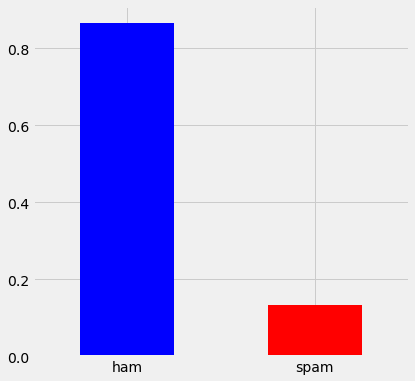

In [20]:
print(appendix['Label'].value_counts(normalize = True))

fig = plt.figure(figsize=(6, 6))  
plt.style.use('fivethirtyeight')
appendix['Label'].value_counts(normalize = True).plot.bar(color = ['blue','red'], rot = 0)
plt.show()

### Splitting Dataset for Training and Testing
Our data set is approximately made up of 87% 'ham(non-spam)' and 13& 'spam' messages.
We will split the above dataset into two categories by randomizing the entire dataset to ensure that spam and ham (non-spam) messages are spread proportionately throughout the dataset.:
**Training Set** for training the model on how to classify messages. 80% of the dataset or 4458 messages will be used for training.
**Test Set** for testing the spam filter performance. Remaining 20% i.e. 1114 messages will be used for testing. Spam filter must classify new messages with an accuracy greater than 80% as spam or ham (non-spam).

In [21]:
# Randomize and split dataset into training and test sets
appendix = appendix.sample(frac = 1, random_state = 1)
appendix_training = appendix.head(int(0.8*appendix.Label.size)+1).reset_index(drop = True) # To round of the next higher integer
appendix_test = appendix.tail(int(0.2*appendix.Label.size)).reset_index(drop = True)
print(appendix_training.info())
print(appendix_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4458 entries, 0 to 4457
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4458 non-null   object
 1   SMS     4458 non-null   object
dtypes: object(2)
memory usage: 69.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   1114 non-null   object
 1   SMS     1114 non-null   object
dtypes: object(2)
memory usage: 17.5+ KB
None


**After above splitting, we have used the training dataset for training the model `nbayes_trainer`. In case, a test dataset is not needed, this splitting is not required. All the following functions are automatically performed by the model**.

Training:  
 ham     0.86541
spam    0.13459
Name: Label, dtype: float64


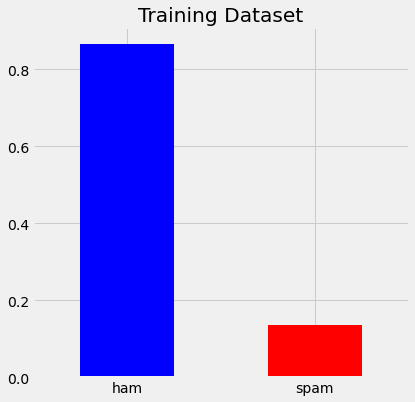

In [22]:
# Check proportion of ham and spam in training dataset
print("Training: ", '\n', appendix_training['Label'].value_counts(normalize = True))

fig = plt.figure(figsize=(6, 6))  
plt.style.use('fivethirtyeight')
sms_training['Label'].value_counts(normalize = True).plot.bar(color = ['blue','red'], rot = 0)
plt.title("Training Dataset")
plt.show()

Test:  
 ham     0.868043
spam    0.131957
Name: Label, dtype: float64


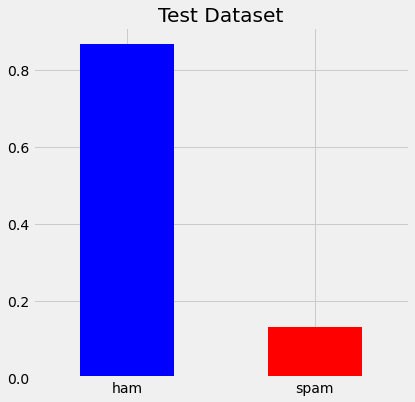

In [23]:
# Check proportion of ham and spam in test dataset
print("Test: ", '\n', appendix_test['Label'].value_counts(normalize = True))
fig = plt.figure(figsize=(6, 6))  
plt.style.use('fivethirtyeight')
sms_test['Label'].value_counts(normalize = True).plot.bar(color = ['blue','red'], rot = 0)
plt.title("Test Dataset")
plt.show()

### Organizing Datasets

We have to organize datasets in a format in which it is possible to count probabilities of particular words occurring in a message P(w/spam) and p(w/ham), such as:
![image.png](attachment:image.png)

- First, we will clean the dataset to remove unrequired characters such as punctuation, and will also convert all words to lower-case.
- Next, we will crete a list `vocabulary` containing unique words in the training dataset.
- Then, a dictionary containing key-value pairs with words as keys and their counts as values
- Finally, we will transform `vocabulary` into columns of dataset as depicted above.

In [24]:
# Remove Punctuation and change to lower case.

import re
def repl_punctuation(string):
    return re.sub(pattern = r'\W', repl = ' ', string = string)

appendix_training['SMS'] = appendix_training.SMS.apply(repl_punctuation).str.lower()

In [25]:
appendix_training.info()
print(appendix_training.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4458 entries, 0 to 4457
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4458 non-null   object
 1   SMS     4458 non-null   object
dtypes: object(2)
memory usage: 69.8+ KB
  Label                                                SMS
0   ham                       yep  by the pretty sculpture
1   ham      yes  princess  are you going to make me moan 
2   ham                         welp apparently he retired
3   ham                                            havent 
4   ham  i forgot 2 ask ü all smth   there s a card on ...


In [26]:
# Create a vocabulary 

vocab = []

appendix_training['SMS'] = appendix_training.SMS.str.split()

for list in appendix_training.SMS:
    for i in range(0, len(list)):
        word = list[i]
        vocab.append(word)
vocab = set(vocab) # Convert to set to remove duplicates

vocabulary = []
for item in vocab:
    vocabulary.append(item) # Transforming back to list to facilitate list operations
print(len(vocabulary))       
print(vocabulary[:5])

7783
['allah', 'psychiatrist', 'listener', 'scammers', 'atrocious']


In [27]:
# Transform vocabulary into dictionary of unique word key-value pairs
appendix_word_count = {}
for word in vocabulary:
    appendix_word_count[word] = [0] * len(appendix_training.SMS) # Initialize the dictionary values to zero for each unique word in each sms

# Iterate over SMS column in training data set to populate dictionary getting both index and sms
for index, sms in enumerate(appendix_training.SMS):
    for word in sms:
        appendix_word_count[word][index] += 1
        

# Convert to dataframe

appendix_word_count = pd.DataFrame(appendix_word_count)

# Concatenate with training dataset to have labels and SMS
appendix_training_data_clean = pd.concat([appendix_training, appendix_word_count], axis = 1)
print(appendix_training_data_clean.tail())

     Label                                                SMS  allah  \
4453   ham  [sorry, i, ll, call, later, in, meeting, any, ...      0   
4454   ham  [babe, i, fucking, love, you, too, you, know, ...      0   
4455  spam  [u, ve, been, selected, to, stay, in, 1, of, 2...      0   
4456   ham  [hello, my, boytoy, geeee, i, miss, you, alrea...      0   
4457   ham                            [wherre, s, my, boytoy]      0   

      psychiatrist  listener  scammers  atrocious  how  7ws  ummma  cs  ard  \
4453             0         0         0          0    0    0      0   0    0   
4454             0         0         0          0    0    0      0   0    0   
4455             0         0         0          0    0    0      0   0    0   
4456             0         0         0          0    0    0      0   0    0   
4457             0         0         0          0    0    0      0   0    0   

      kl341  jealous  brisk  community  165  69888  rememberi  asjesus  neck  \
4453      0 

## Appendix-II: Conditional Probability Core Functions
A number of functions involving repeated probability calculations will be required. In order to facilitate calculations, we will write a set of core functions or a library of core conditional probability functions.

In [28]:
# Event Probability Function P(E)

def p_event(n, s=1):
    """ Calculates the probability P(E) of an event E
    Args:
    n(int): total number of possible outcomes
    s(int): number of successful outcomes, default: 1
    Returns:
    float: empirical and/ or theoretical probability of an event
    """
    probability = s/ n
    return probability

In [29]:
# Complement of event probability Function P(Ec)

def p_non_event(n, s=1): 
    """ Calculates the non-probability or complement probability P(Ec) of an event E
    Args:
    n(int): total number of possible outcomes
    s(int): number of successful outcomes, default: 1
    Returns:
    float: empirical and/ or theoretical non_probability of an event
    """
    probability = s/ n
    non_probability = 1 - probability
    return non_probability

In [30]:
# Intersection of successful outcomes 

def intersection_card(outcome_A, outcome_B): 
    """ Calculates the intersection of outcomes for two events 
    or
    Calculates cardinal of intersection of two sets, card(AnB)
    Args:
    outcome_A(list): Successful outcomes for event A
    outcome_B(list): Successful outcomes for event B
    Returns:
    int: Cardinal of outcome_A intersection outcome_B, card(A n B)
    """
    outcome_A = set(outcome_A)
    outcome_B = set(outcome_B)
    card_A_and_B = len(outcome_A.intersection(outcome_B))
    return card_A_and_B

In [31]:
# Conditional Probability of an Event A given an Event B based on set cardinals
def probability_A_given_B_card(outcome_A, outcome_B):
    """ Calculates the conditional probability of an event A given an event B 
    or
    P(A|B)
    Args:
    outcome_A(list): Successful outcomes for event A
    outcome_B(list): Successful outcomes for event B
    Returns:
    float: conditional probability of event A given event B
    """
    outcome_A = set(outcome_A)
    outcome_B = set(outcome_B)
    card_A_and_B = len(outcome_A.intersection(outcome_B))
    card_B = len(outcome_B)
    p_a_given_b = card_A_and_B / card_B
    
    return p_a_given_b

In [32]:
 # Conditional Probability of an Event A given an Event B based on probabilities
def p_A_given_B_prob(p_B, p_A_and_B):
    """ Calculates the conditional probability of an event A given an event B,
    from the probabilities of events A and A intersection A
    or 
    P(A|B)
    Args:
    p_B(float): Probability of event B
    p_A_and_B(float): Probability of event AnB, or P(AnB)
    Returns:
    float: conditional probability of event A given event B
    """
    p_a_given_b = p_A_and_B / p_B
    
    return p_a_given_b

In [33]:
# Probability of an event A and an event B based on cardinals, P(AnB)

def p_A_and_B_card(omega, outcome_A, outcome_B):
    """ Calculates the probability of an event A and an event B, A intersection B 
    or
    P(AnB)
    Args:
    omega(list): All possible outcomes, or sample space 
    outcome_A(list): Successful outcomes for event A
    outcome_B(list): Successful outcomes for event B
    Returns:
    float: conditional probability of event A given event B
    """
    omega = set(omega)
    outcome_A = set(outcome_A)
    outcome_B = set(outcome_B)
    card_A_and_B = len(outcome_A.intersection(outcome_B))
    card_omega = len(omega)
    p_a_and_b = card_A_and_B / card_omega
    
    return p_a_and_b

In [34]:
# Probability of two dependent events A and B based on prior probabilities, P(AnB)

def p_A_and_B_prob(p_B, p_A_given_B):
    """ Calculates the conditional probability of an event A given an event B,
    from the probabilities of events A and A intersection B
    or 
    P(A|B)
    Args:
    p_B(float): Probability of event B
    p_A_and_B(float): Probability of event AnB, or P(AnB)
    Returns:
    float: conditional probability of event A given event B
    """
    p_a_and_b = p_A_given_B * p_B 
    return p_a_and_b

In [35]:
# Probability of two independent events A and B based on prior probabilities, P(AnB)

def p_A_and_B_prob(p_A, p_B):
    """ Calculates the conditional probability of an event A given an event B,
    from the probabilities of events A and A intersection B
    or 
    P(A|B)
    Args:
    p_B(float): Probability of event B
    p_A_and_B(float): Probability of event AnB, or P(AnB)
    Returns:
    float: conditional probability of event A given event B
    """
    p_a_and_b = p_A * p_B
    return p_a_and_b

In [36]:
# Probability of an Even A or an Event B
def p_A_or_B(p_A, p_B, p_a_and_b = 0):
    """ Calculates the conditional probability of an event A or an event B,
    from the probabilities of events A, B and A intersection B
    or 
    P(A|B)
    Args:
    p_B(float): Probability of event B
    p_A_and_B(float): Probability of event AnB, or P(AnB); default = 0(for mutually exclusive events)
    Returns:
    float: Probability of event AuB, or P(AuB)
    """
    p_a_or_b = p_A + p_B + p_a_and_b
    return p_a_or_b
    

In [37]:
# Total Probability of an event A dependent on an event B
def p_total_A(p_B, p_a_given_b):
    """ Calculates the total probability of an event A 
    or 
    P(A)
    Args:
    p_B(list): Probability of events B1, B2, B3....Bn
    p_a_given_b(list): Probability of events A|B1, A|B2, A|B3 .... A|Bn
    Returns:
    float: Probability of event A, or P(A)
    """
    probability_list = []
    for p_a, p_a_g_b in zip(p_B, p_a_given_b):
        p_total = p_a * p_a_g_b
        probability_list.append(p_total)

                        
    p_total_A = sum(probability_list)
    return p_total_A

In [38]:
# Bayes Theorem
def p_B_given_A_Bayes(p_Bi, p_a_given_bi, p_B, p_a_given_b):
    """ Calculates the probability of an event B given A 
    or 
    P(A)
    Args:
    p_Bi(list): Probability of events B1, B2, B3....Bn
    p_a_given_bi(list): Probability of events A|B1, A|B2, A|B3 .... A|Bn
    p_B(float): Probability of event B
    p_a_given_b(float): Probability of event A given B
    Returns:
    float: Probability of event A, or P(A)
    """
    probability_list = []
    for p_a, p_a_g_b in zip(p_Bi, p_a_given_bi):
        p_total = p_a * p_a_g_b
        probability_list.append(p_total)

                        
    p_b_given_a = p_B * p_a_given_b/sum(probability_list)
    return p_b_given_a

In [39]:
# Naive Bayes Algorithm 
def p_nBayes(p_B, p_a_given_b):
    """ Calculates the probability of an event B given A times probability of A and non_B given A times probability of A
    or 
    P(A)
    Args:
    p_Bi(list): Probability of events B1, B2, B3....Bn
    p_a_given_bi(list): Probability of events A|B1, A|B2, A|B3 .... A|Bn
    p_B(float): Probability of event B
    p_a_given_b(float): Probability of event A given B
    Returns:
    bool: True if P(B|A) * P(A) > P(non_B|A) * P(A)
    """
                           
    p_b_given_a = p_B * p_a_given_b
    p_non_b_given_a = p_non_b * p_a_given_non_b
    
    if p_b_given_a > p_non_b_given_a:
        return True
    
    else:
        return False